# Lecture 1: floating point
### Sasha Tchekhovskoy

## import useful libraries

In [ ]:
import ctypes
from ctypes import *
from numpy.ctypeslib import ndpointer
import numpy as np
import matplotlib.pyplot as plt
import numba

## adjust fonts and font sizes

In [2]:
import matplotlib as mpl
from matplotlib import rc

#choose Computer Modern Roman fonts by default
mpl.rcParams['font.serif'] = 'cmr10'
mpl.rcParams['font.sans-serif'] = 'cmr10'
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['legend.handlelength'] = 2
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus']=False
#uncomment these two lines and rerun the notebook
#before exporting as PDF for high-quality plots
#mpl.rcParams['figure.figsize'] = (8, 4)
#mpl.rcParams['figure.dpi'] = 300

# Is sin(pi) zero?

In [7]:
f = np.sin(np.pi)
print("sin(pi) = %g" % f)
print("Is it non-zero?")
if 0 == f: print("Yes!")
else: print("No")

sin(pi) = 1.22465e-16
Is it non-zero? 
Yes!


## smallest values that floating point can resolve relative to unity

In [4]:
eps_float32 = np.finfo(np.float32).eps
eps_float64 = np.finfo(np.float64).eps
print(r"eps(float32) = %g" % eps_float32)
print(r"eps(float64) = %g" % eps_float64)

eps(float32) = 1.19209e-07
eps(float64) = 2.22045e-16


## epsilon is the smallest number resolvable relative to unity

In [10]:
f1 = 1.0 + eps_float64
f2 = 1.0 + eps_float64/2
print(f1 == 1)
print(f2 == 1)

False
True


## Exercise 1: compute eps_float64

# Numerical derivatives
## Exercise 2: Numerically compute the derivative of $sin(x)$ and the error $\epsilon$ by comparing to the analytic solution. How does the error scale with $h$? For this, plot $\epsilon$ vs $h$ on a log-log plot and determine the slope.

# Let's solve some OEs!
## Nuclear decay as an example, using RK23 and RK45

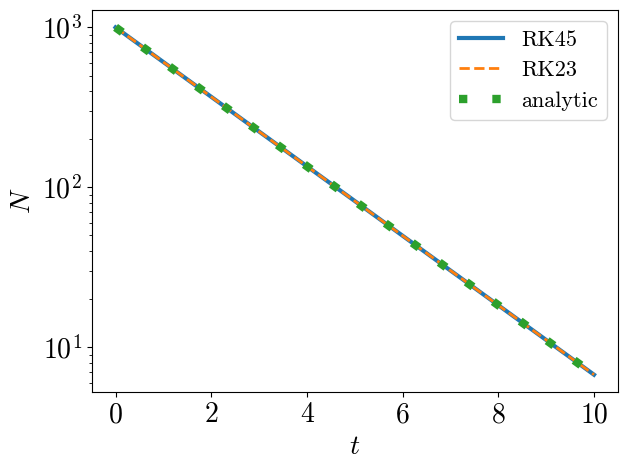

In [81]:
import numpy as np
from scipy.integrate import solve_ivp
def exponential_decay(t, y): return -0.5 * y
sol45 = solve_ivp(exponential_decay, [0, 10], [1e3],method='RK45',max_step = 0.01)
sol23 = solve_ivp(exponential_decay, [0, 10], [1e3],method='RK23',max_step = 0.01)
plt.plot(sol45.t,sol45.y.T,label="RK45",lw=3)
l,=plt.plot(sol23.t,sol23.y.T,"--",label="RK23",lw=2)
l2,=plt.plot(sol23.t,1e3*np.exp(-sol23.t/2),lw=6,label="analytic")
l2.set_dashes([1,3])
plt.yscale("log")
plt.ylabel(r"$N$",fontsize=20)
plt.xlabel(r"$t$",fontsize=20)
plt.legend()
plt.tight_layout()
plt.savefig("decay.pdf")

## Exercise 3: How does the error scale with $\Delta t$? For this, plot the error vs $\Delta t$ on a log-log plot and determine the slope.